In [1]:
# import library to load ".tab" files
import pandas as pd

# import library to visualise synthetic and UKHLS data
import matplotlib.pyplot as plt

# import OPENAI class to generate synthetic data
from openai import OpenAI

# import library to generate random numbers
import random

# import library to format synthetic data in JSON format. 
import json

# import OPENAI library to generate synthetic data
import openai

# import the library for Counter
from collections import Counter

# import backoff library to handle exponential exceptions
import backoff

# import the time library to measure the time taken to run the code
import time

# import wrap from textwrap
from textwrap import wrap

### Data Files Loading

In [2]:
def data_loading(filename, wave_of_study):
    """
    Description: This function loads the variables from a file from a specific wave of UKHLS study.
    Parameters:
    •	‘filename’ (string): the name of the file to be loaded. 
    •	‘wave_of_study’: determines which wave of UKHLS study to be loaded. 
    Returns:
    •	A list of relevant sample responses for comparing with the synthetic LLM values. 
    Raises:
    •	‘ValueError’ if wave of study or filename are not valid. 
    """
    if wave_of_study not in range(1, 14):
        raise ValueError("Invalid wave of study")

    if wave_of_study == 1:
        filename = 'a_' + filename
    elif wave_of_study == 2:
        filename = 'b_' + filename
    elif wave_of_study == 3:
        filename = 'c_' + filename
    elif wave_of_study == 4:
        filename = 'd_' + filename
    elif wave_of_study == 5:
        filename = 'e_' + filename
    elif wave_of_study == 6:
        filename = 'f_' + filename
    elif wave_of_study == 7:
        filename = 'g_' + filename
    elif wave_of_study == 8:
        filename = 'h_' + filename
    elif wave_of_study == 9:
        filename = 'i_' + filename
    elif wave_of_study == 10:
        filename = 'j_' + filename
    elif wave_of_study == 11:
        filename = 'k_' + filename
    elif wave_of_study == 12:
        filename = 'l_' + filename
    elif wave_of_study == 13:
        filename = 'm_' + filename

    return pd.read_csv('tab/ukhls/' + filename, sep='\t', low_memory=False) # test: set low_memory=False

In [3]:
def screen_environmental_views(data, letter, variable_names=None):
    """
    Dynamically screens environmental views based on specified variable prefixes in a DataFrame.

    Parameters:
    • data (DataFrame): The DataFrame containing the UKHLS data.
    • letter (str): The prefix for the variable names, indicating the wave of the study.
    • variable_names (list of str, optional): List of base variable names to be screened. If None, uses a default list.

    Returns:
    • dict: A dictionary of the environmental views with variables as keys and their data as values.
    """
    if variable_names is None:
        variable_names = [
            "scenv_bcon", "scenv_brit", "scenv_ccls", "scenv_cfit", "scopecl30",
            "scenv_chwo", "scenv_crlf", "scenv_dstr", "scenv_exag", "scenv_pmep",
            "scenv_ftst", "scenv_futr", "scenv_grn", "scenv_pmre", "scenv_bccc",
            "scenv_meds"
        ]

    environmental_views = {}

    for base_var in variable_names: # iterate through the base variable names
        full_var = f"{letter}_{base_var}" # initialise the variable names based on the wave of the study
        if full_var in data.columns: # if the variable is conducted in the study
            environmental_views[base_var] = data[full_var] # store the data in the dictionary
        else: # if the variable is not conducted in the study
            environmental_views[base_var] = None # store None in the dictionary

    return environmental_views

In [4]:
def load_profiling_data():

    # UKHLS profiling data loading examples
    first_wave_ukhls_indresp = data_loading('indresp.tab', 1) # Load the first wave data
    second_wave_ukhls_indresp = data_loading('indresp.tab', 2) # Load the second wave data
    third_wave_ukhls_indresp = data_loading('indresp.tab', 3) # Load the third wave data
    fourth_wave_ukhls_indresp = data_loading('indresp.tab', 4) # Load the fourth wave data
    fifth_wave_ukhls_indresp = data_loading('indresp.tab', 5) # Load the fifth wave data
    sixth_wave_ukhls_indresp = data_loading('indresp.tab', 6) # Load the sixth wave data
    seventh_wave_ukhls_indresp = data_loading('indresp.tab', 7) # Load the seventh wave data
    eighth_wave_ukhls_indresp = data_loading('indresp.tab', 8) # Load the eighth wave data
    ninth_wave_ukhls_indresp = data_loading('indresp.tab', 9) # Load the ninth wave data
    tenth_wave_ukhls_indresp = data_loading('indresp.tab', 10) # Load the tenth wave data
    eleventh_wave_ukhls_indresp = data_loading('indresp.tab', 11) # Load the eleventh wave data
    twelfth_wave_ukhls_indresp = data_loading('indresp.tab', 12) # Load the twelfth wave data
    thirteenth_wave_ukhls_indresp = data_loading('indresp.tab', 13) # Load the thirteenth wave data

    first_wave_ukhls_indall = data_loading('indall.tab', 1) # Load the first wave data
    second_wave_ukhls_indall = data_loading('indall.tab', 2) # Load the second wave data
    third_wave_ukhls_indall = data_loading('indall.tab', 3) # Load the third wave data
    fourth_wave_ukhls_indall = data_loading('indall.tab', 4) # Load the fourth wave data
    fifth_wave_ukhls_indall = data_loading('indall.tab', 5) # Load the fifth wave data
    sixth_wave_ukhls_indall = data_loading('indall.tab', 6) # Load the sixth wave data
    seventh_wave_ukhls_indall = data_loading('indall.tab', 7) # Load the seventh wave data
    eighth_wave_ukhls_indall = data_loading('indall.tab', 8) # Load the eighth wave data
    ninth_wave_ukhls_indall = data_loading('indall.tab', 9) # Load the ninth wave data
    tenth_wave_ukhls_indall = data_loading('indall.tab', 10) # Load the tenth wave data
    eleventh_wave_ukhls_indall = data_loading('indall.tab', 11) # Load the eleventh wave data
    twelfth_wave_ukhls_indall = data_loading('indall.tab', 12) # Load the twelfth wave data

    first_wave_ukhls_hhresp = data_loading('hhresp.tab', 1) # Load the first wave data
    second_wave_ukhls_hhresp = data_loading('hhresp.tab', 2) # Load the second wave data
    third_wave_ukhls_hhresp = data_loading('hhresp.tab', 3) # Load the third wave data
    fourth_wave_ukhls_hhresp = data_loading('hhresp.tab', 4) # Load the fourth wave data
    fifth_wave_ukhls_hhresp = data_loading('hhresp.tab', 5) # Load the fifth wave data
    sixth_wave_ukhls_hhresp = data_loading('hhresp.tab', 6) # Load the sixth wave data
    seventh_wave_ukhls_hhresp = data_loading('hhresp.tab', 7) # Load the seventh wave data
    eighth_wave_ukhls_hhresp = data_loading('hhresp.tab', 8) # Load the eighth wave data
    ninth_wave_ukhls_hhresp = data_loading('hhresp.tab', 9) # Load the ninth wave data
    tenth_wave_ukhls_hhresp = data_loading('hhresp.tab', 10) # Load the tenth wave data
    eleventh_wave_ukhls_hhresp = data_loading('hhresp.tab', 11) # Load the eleventh wave data
    twelfth_wave_ukhls_hhresp = data_loading('hhresp.tab', 12) # Load the twelfth wave data
    thirteenth_wave_ukhls_hhresp = data_loading('hhresp.tab', 13) # Load the thirteenth wave data

    indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, eighth_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp, thirteenth_wave_ukhls_indresp]
    indall_data = [first_wave_ukhls_indall, second_wave_ukhls_indall, third_wave_ukhls_indall, fourth_wave_ukhls_indall, fifth_wave_ukhls_indall, sixth_wave_ukhls_indall, seventh_wave_ukhls_indall, eighth_wave_ukhls_indall, ninth_wave_ukhls_indall, tenth_wave_ukhls_indall, eleventh_wave_ukhls_indall, twelfth_wave_ukhls_indall]
    hhresp_data = [first_wave_ukhls_hhresp, second_wave_ukhls_hhresp, third_wave_ukhls_hhresp, fourth_wave_ukhls_hhresp, fifth_wave_ukhls_hhresp, sixth_wave_ukhls_hhresp, seventh_wave_ukhls_hhresp, eighth_wave_ukhls_hhresp, ninth_wave_ukhls_hhresp, tenth_wave_ukhls_hhresp, eleventh_wave_ukhls_hhresp, twelfth_wave_ukhls_hhresp, thirteenth_wave_ukhls_hhresp]

    return indresp_data, indall_data, hhresp_data

In [5]:
def load_environmental_views_data(first_wave_ukhls_indresp, fourth_wave_ukhls_indresp, tenth_wave_ukhls_indresp):
    # UKHLS environmental views screening examples
    # Screen the environmental views of the individuals in the first wave data
    first_wave_ukhls_environmental_views = screen_environmental_views(first_wave_ukhls_indresp, 'a') 
    # Screen the environmental views of the individuals in the fourth wave data
    fourth_wave_ukhls_environmental_views = screen_environmental_views(fourth_wave_ukhls_indresp, 'd')
    # Screen the environmental views of the individuals in the tenth wave data
    tenth_wave_ukhls_environmental_views = screen_environmental_views(tenth_wave_ukhls_indresp, 'j') 

    environmental_views_data = [first_wave_ukhls_environmental_views, fourth_wave_ukhls_environmental_views, tenth_wave_ukhls_environmental_views]

    return environmental_views_data

In [6]:
indresp_data, indall_data, hhresp_data = load_profiling_data()

In [7]:
first_wave_ukhls_indresp, fourth_wave_ukhls_indresp, tenth_wave_ukhls_indresp = indresp_data[0], indresp_data[3], indresp_data[9]

environmental_views_data = load_environmental_views_data(first_wave_ukhls_indresp, fourth_wave_ukhls_indresp, tenth_wave_ukhls_indresp)

### Question Response Distribution

#### DEMO QUESTION: And which of these would you say best describes your current lifestyle? 

##### Visualisation Function

In [8]:
def visualise_scenv_crlf(scenv_crlf_distribution, wave_number):
    """
    Visualizes the probability distribution of the scenv_crlf variable.

    Parameters:
    - scenv_crlf_distribution (pandas.Series): A pandas Series containing the scenv_crlf variable distribution.
    - wave_number (int): The wave number of the UKHLS study.

    Returns:
    - scenv_crlf_probability_distribution_dict (dict): A dictionary representing the probability distribution of the scenv_crlf variable.
    """

    # Define the mapping dictionary for the scenv_crlf variable to convert numeric codes to descriptive labels
    scenv_crlf_dict = {
        1: "Don't do Anything Environmentally Friendly",
        2: "Do One or Two Things Environmentally Friendly",
        3: "Do Some Things Environmentally Friendly",
        4: "Do Many Things Environmentally Friendly",
        5: "Do Everything Environmentally Friendly"
    }

    # Define a list to store the ordered categories. 
    ordered_categories = [
        "Don't do Anything Environmentally Friendly", 
        "Do One or Two Things Environmentally Friendly", 
        "Do Some Things Environmentally Friendly", 
        "Do Many Things Environmentally Friendly", 
        "Do Everything Environmentally Friendly"
    ]

    # remove invalid values less than 0 from the dataframe
    scenv_crlf_distribution = scenv_crlf_distribution[scenv_crlf_distribution > 0]

    # Map the numeric codes to descriptive labels using the dictionary
    scenv_crlf_labels = scenv_crlf_distribution.map(scenv_crlf_dict)

    # Calculate the probability distribution of the scenv_crlf labels
    scenv_crlf_probability_distribution = scenv_crlf_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    scenv_crlf_probability_distribution_dict = scenv_crlf_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "None", 2: "Few", 3: "Some", 4: "Many", 5: "All"}
    scenv_crlf_probability_distribution_dict = {k: scenv_crlf_probability_distribution_dict[k] for k in ordered_categories}

    # Display the probability distribution of the scenv_crlf variable in a bar chart
    plt.bar(scenv_crlf_probability_distribution_dict.keys(), scenv_crlf_probability_distribution_dict.values())

    ordered_categories = ['\n'.join(wrap(l, 12)) for l in ordered_categories]

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks([0, 1, 2, 3, 4], rotation=90, fontsize = 8, labels=ordered_categories)

    plt.xlabel('Environmental Friendly Behaviour')
    plt.ylabel('Probability')

    plt.title('Environmental Friendly Behaviour Probability Distribution Wave ' + str(wave_number))

    plt.savefig("Figures/Environmental-Views-Variables/scenv_crlf/Environmental Friendly Behaviour Probability Distribution Wave " + str(wave_number) + ".png", bbox_inches='tight') # save the figure as a png file
    
    plt.show()

    return scenv_crlf_probability_distribution_dict

##### Save Distribution to JSON

In [57]:
def write_distribution(distribution_dict, wave_number, variable_name):
    """
    Writes the probability distribution of the scenv_crlf variable to a JSON file.

    Parameters:
    - distribution_dict (dict): A dictionary representing the probability distribution of the scenv_crlf variable.
    - wave_number (int): The wave number of the UKHLS study.
    - variable_name (str): The name of the variable.
    """

    if variable_name == "scenv_crlf":

        image_name = "Environmental Friendly Behaviour"

    elif variable_name == "OverallClimateChangeImpactPerception":

        image_name = "Overall Climate Change Impact Perception"

    elif variable_name == "scenv_bccc":

        image_name = "Scenv Bccc"

    elif variable_name == "scenv_pmep":

        image_name = "Scenv Pmep"

    elif variable_name == "OpenVB":

        image_name = "Open VB"

    elif variable_name == "scenv_meds":

        image_name = "Scenv Meds"

    elif variable_name == "etariff":

        image_name = "etariff"

    elif variable_name == "grimyn":

        image_name = "grimyn"

    elif variable_name == "orga3":

        image_name = "orga3"

    elif variable_name == "scenv_tlat":

        image_name = "Scenv Tlat"

    # Write the probability distribution of the scenv_crlf variable to a JSON file
    with open(f"Environmental-Views-Variables/{variable_name}/{image_name} Probability Distribution Wave {wave_number}.json", "w") as outfile:
        json.dump(distribution_dict, outfile)

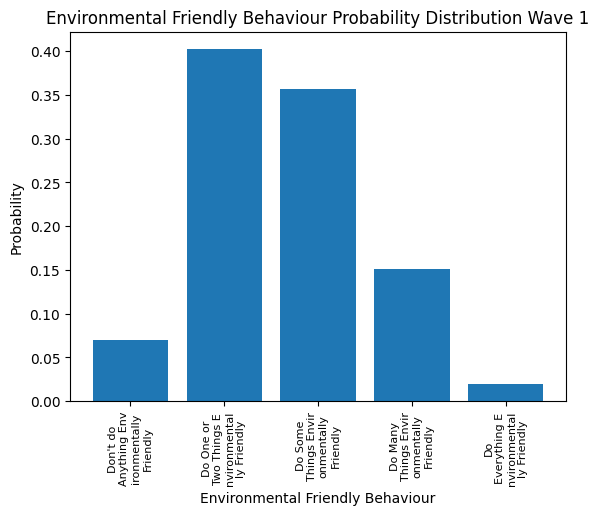

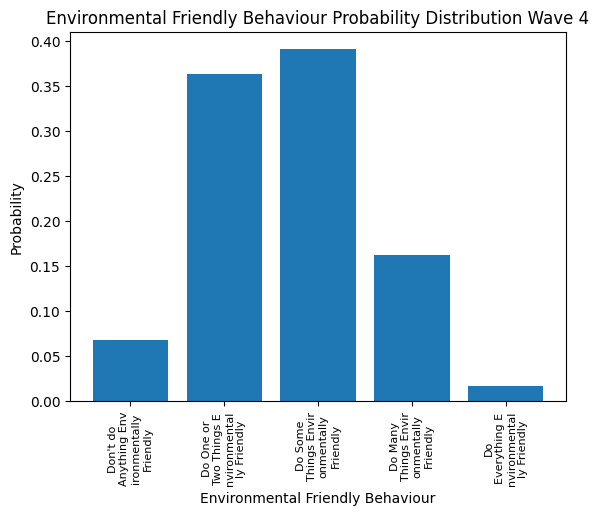

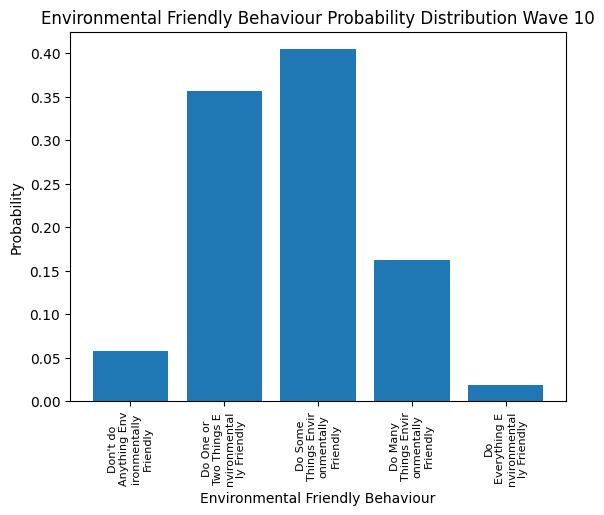

In [10]:
wave_numbers = [1, 4, 10]

i = 0

for distribution in environmental_views_data:

    scenv_crlf_distribution = distribution["scenv_crlf"]

    scenv_crlf_probability_distribution_dict = visualise_scenv_crlf(scenv_crlf_distribution, wave_numbers[i])

    write_distribution(scenv_crlf_probability_distribution_dict, wave_numbers[i], "scenv_crlf")

    i += 1

#### Q1: Overall, how positive or negative do you think the effects of climate change will be?

In [11]:
# given the survey data on the UK population from Steentjes et al. 2017 as 
# 2% Entirely Positive 
# 10% More Positive than Negative
# 26% Neither
# 44% More Negative than Positive
# 13% Entirely Negative
# 4% Don't Know
# initialise a data distribution for q1 
q1_human_distribution = {
    "Entirely Positive": 0.02,
    "More Positive than Negative": 0.10,
    "Neither": 0.26,
    "More Negative than Positive": 0.44,
    "Entirely Negative": 0.13,
    "Don't Know": 0.04
}

# use q1_human_distribution to create a list of responses
q1_human_responses = list(q1_human_distribution.keys())

print(q1_human_responses)

['Entirely Positive', 'More Positive than Negative', 'Neither', 'More Negative than Positive', 'Entirely Negative', "Don't Know"]


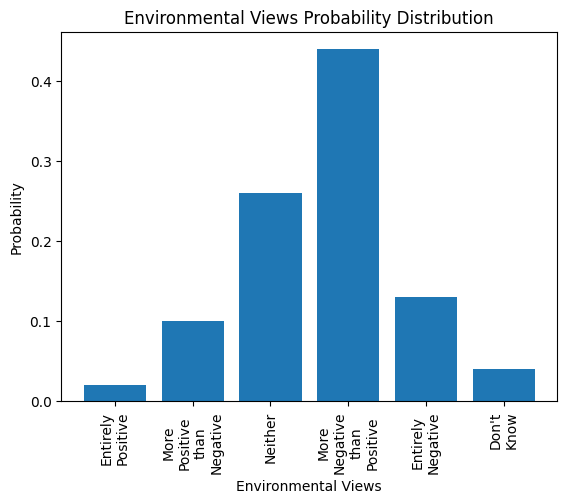

In [12]:
# initialise a list of integers corresponding to q1_human_responses
q1_human_responses_int = [0, 1, 2, 3, 4, 5]


q1_human_responses = ['\n'.join(wrap(l, 8)) for l in q1_human_responses]

# visualise the variable q1_human_distribution as a bar chart
plt.bar(q1_human_distribution.keys(), q1_human_distribution.values())
plt.xlabel('Environmental Views')
plt.ylabel('Probability')
plt.title('Environmental Views Probability Distribution')
plt.xticks(q1_human_responses_int, q1_human_responses, rotation=90)
plt.savefig("Figures/Environmental-Views-Variables/q1_human_distribution.png", bbox_inches='tight')

In [13]:
write_distribution(q1_human_distribution, 1, "OverallClimateChangeImpactPerception")

#### Q2: Please select the extent to which you agree or disagree with the following statement: My behaviour and everyday lifestyle contribute to climate change.

##### Visualisation Function

In [14]:
def visualise_scenv_bccc(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_bccc variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_bccc variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_bccc_values = data.unique()

    scenv_bccc_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Define a list to store the ordered categories.
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_bccc_dict)

    # Calculate the probability distribution of the scenv_bccc labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_bccc variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Bccc')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Bccc Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_bccc/Scenv Bccc Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Bccc Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_bccc/Scenv Bccc Probability Distribution Wave 10.png", bbox_inches='tight')
    
    plt.show()

    return data_probability_distribution

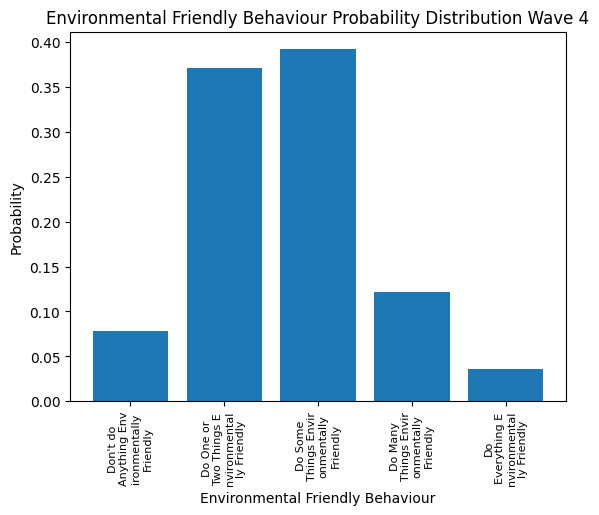

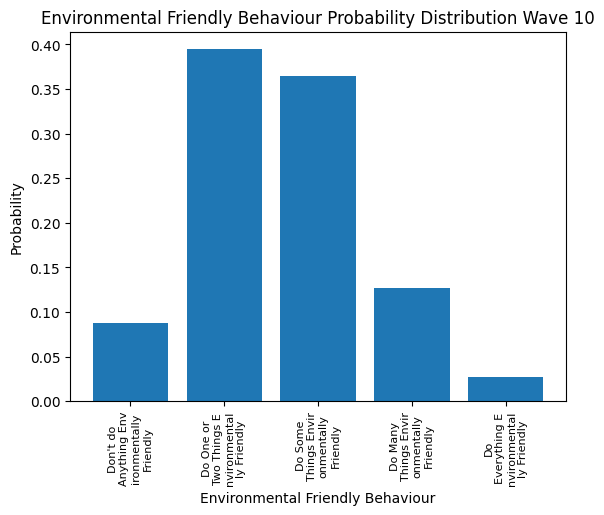

In [15]:
wave_numbers = [1, 4, 10]

i = 0

for distribution in environmental_views_data:

    if i != 0:

        scenv_bccc_distribution = distribution["scenv_bccc"]

        scenv_bccc_probability_distribution_dict = visualise_scenv_crlf(scenv_bccc_distribution, wave_numbers[i])

        write_distribution(scenv_bccc_probability_distribution_dict, wave_numbers[i], "scenv_bccc")

    i += 1

#### Q3: To which extent do you agree or disagree with the following statement: 'I would be prepared to pay more for environmentally friendly products.'? Please select one of the following options: 'Strongly Agree', 'Tend to Agree', 'Neither Agree nor Disagree', 'Tend to Disagree', 'Strongly Disagree'.

##### Visualisation Function

In [16]:
def visualise_scenv_pmep(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_pmep variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_pmep variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_pmep_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    scenv_pmep_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_pmep_dict)

    # Calculate the probability distribution of the scenv_pmep labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_pmep variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Pmep')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Pmep Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_pmep/Scenv Pmep Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Pmep Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_pmep/Scenv Pmep Probability Distribution Wave 10.png", bbox_inches='tight')
    
    plt.show()

    return data_probability_distribution

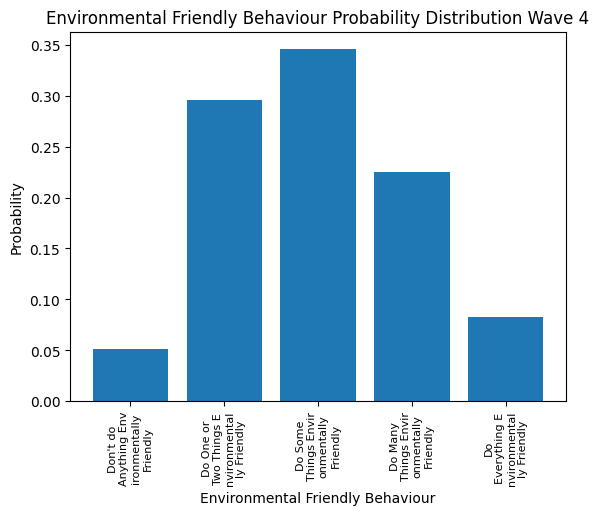

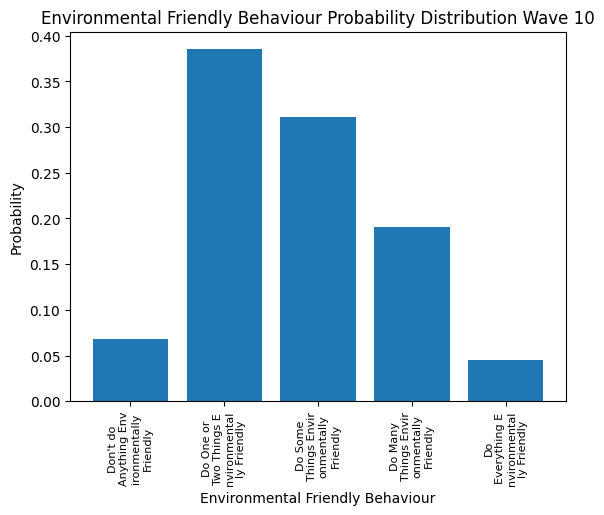

In [17]:
wave_numbers = [1, 4, 10]

i = 0

for distribution in environmental_views_data:

    if i != 0:

        scenv_pmep_distribution = distribution["scenv_pmep"]

        scenv_pmep_probability_distribution_dict = visualise_scenv_crlf(scenv_pmep_distribution, wave_numbers[i])

        write_distribution(scenv_pmep_probability_distribution_dict, wave_numbers[i], "scenv_pmep")

    i += 1

#### Q4: Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?

##### Data Loading

In [18]:
br_openvb_distribution = {
    "Strongly Agree": 0.05,
    "Agree": 0.45,
    "Disagree": 0.28,
    "Strongly Disagree": 0.02,
    "Already Changed": 0.20 
} # initialise a dictionary to store the attitudes about whether personal changes are needed to protect the environment

##### Visualisation Function

In [19]:
def visualise_br_openvb(data_probability_distribution):
    """
    Visualizes the probability distribution of the scenv_pmep variable.

    Parameters:
    - data_probability_distribution (dict): A dictionary representing the probability distribution of the open_vb variable.

    Returns:
    None
    """

    # initialise a variable of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Already Changed"]

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_pmep variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Open VB')
    plt.ylabel('Probability')

    plt.title('Open Vb Probability Distribution Wave 18')

    plt.savefig("Figures/Environmental-Views-Variables/Open_VB/Open VB Probability Distribution Wave 18.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Q4 Visualisations

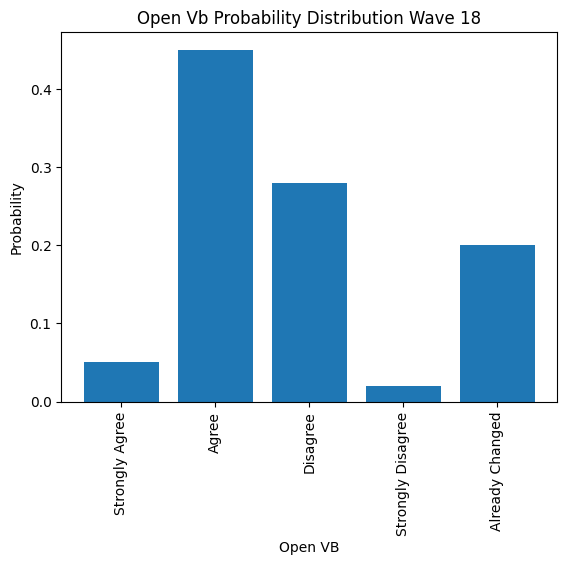

In [21]:
visualise_br_openvb(br_openvb_distribution)

write_distribution(br_openvb_distribution, 18, "OpenVB")

#### Q5: If things continue their current course, will there be an environmental disaster?

##### Data Loading

In [22]:
fourth_wave_meds = fourth_wave_ukhls_indresp["d_scenv_meds"] # fourth wave meds variable
tenth_wave_meds = tenth_wave_ukhls_indresp["j_scenv_meds"] # tenth wave meds variable

##### Visualisation Function

In [23]:
def visualise_scenv_meds(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_meds variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_meds variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_meds_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    scenv_meds_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_meds_dict)

    # Calculate the probability distribution of the scenv_meds labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_meds variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Meds')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Meds Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_meds/Scenv Meds Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Meds Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_meds/Scenv Meds Probability Distribution Wave 10.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Fourth Wave Data

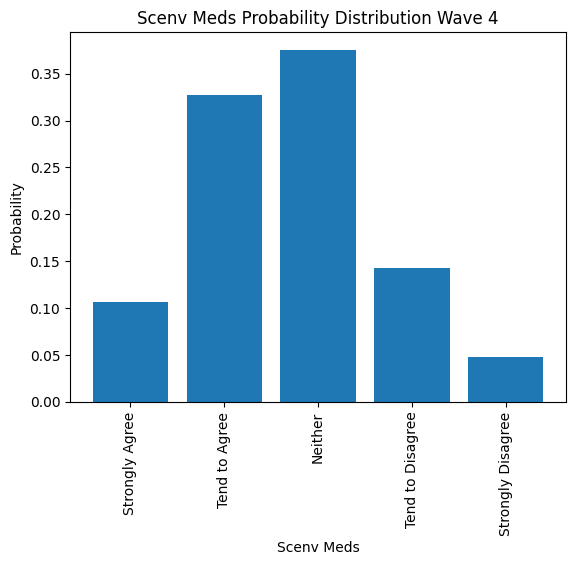

In [26]:
fourth_wave_scenv_meds_probability_distribution = visualise_scenv_meds(fourth_wave_meds, 4) # visualise the fourth wave scenv_meds variable

write_distribution(fourth_wave_scenv_meds_probability_distribution, 4, "scenv_meds")

##### Tenth Wave Data

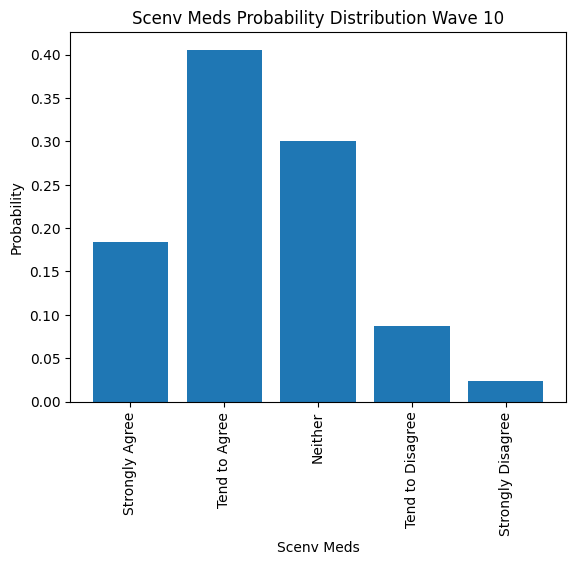

In [27]:
tenth_wave_scenv_meds_probability_distribution = visualise_scenv_meds(tenth_wave_meds, 10) # visualise the tenth wave scenv_meds variable

write_distribution(tenth_wave_scenv_meds_probability_distribution, 10, "scenv_meds")

#### Q6: Does your household buy or considering buying electricity on a Green Tariff? By Green Tariff, we mean a payment scheme where your electricity supplier provides electricity from renewable sources such as wind power to the National Grid for the amount you use. 

##### Data Loading

In [29]:
first_wave_ukhls_hhresp = hhresp_data[0] # load the data hhresp for the first wave
fourth_wave_ukhls_hhresp = hhresp_data[3] # load the data hhresp for the fourth wave
tenth_wave_ukhls_hhresp = hhresp_data[9] # load the data hhresp for the tenth wave
thirteenth_wave_ukhls_hhresp = hhresp_data[12] # load the data hhresp for the thirteenth wave

# load the data etariff from hhresp for waves 1, 4, 10, and 13
first_wave_etariff = first_wave_ukhls_hhresp["a_etariff"]
fourth_wave_etariff = fourth_wave_ukhls_hhresp["d_etariff"]
tenth_wave_etariff = tenth_wave_ukhls_hhresp["j_etariff"]
thirteenth_wave_etariff = thirteenth_wave_ukhls_hhresp["m_etariff"]

##### Visualisation Function

In [30]:
def visualise_etariff(data, wave_number):
    """
    Visualizes the probability distribution of the etariff variable.

    Parameters:
    - data (pandas.Series): The data containing the etariff variable.
    - wave_number (int): The wave number of the data.

    Returns:
    - data_probability_distribution (dict): A dictionary representing the probability distribution of the etariff variable.
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    etariff_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Yes - already buy", "Yes - seriously considering", "No", "Considered and rejected"]

    etariff_dict = {
        1: "Yes - already buy",
        2: "Yes - seriously considering",
        3: "No",
        4: "Considered and rejected"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(etariff_dict)

    # Calculate the probability distribution of the etariff labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Low", 2: "Medium", 3: "High"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the etariff variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    ordered_categories_index = [0, 1, 2, 3]

    ordered_categories = ['\n'.join(wrap(l, 11)) for l in ordered_categories]

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(ordered_categories_index, rotation=90, labels=ordered_categories)

    # set title for the x- and y-axis   
    plt.xlabel('Etariff')
    plt.ylabel('Probability')

    if wave_number == 1:
        plt.title('Etariff Probability Distribution Wave 1')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 1.png", bbox_inches='tight')

    elif wave_number == 4:
        plt.title('Etariff Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:
        plt.title('Etariff Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 10.png", bbox_inches='tight')

    elif wave_number == 13:

        plt.title('Etariff Probability Distribution Wave 13')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 13.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution # return the probability distribution of the etariff variable

##### First Wave Data

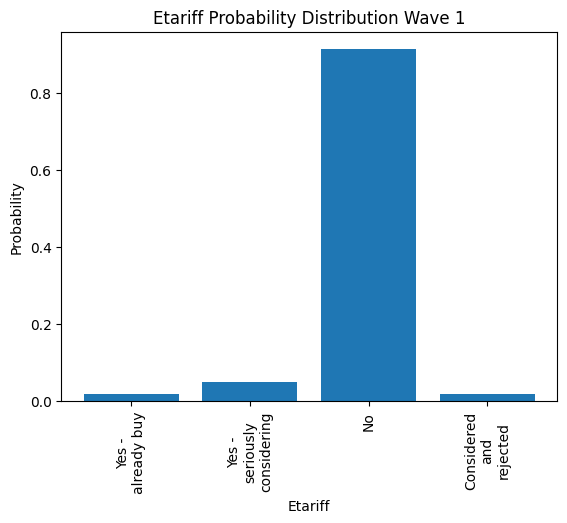

In [32]:
first_wave_etariff_probability_distribution = visualise_etariff(first_wave_etariff, 1) # visualise the first wave etariff variable

write_distribution(first_wave_etariff_probability_distribution, 1, "etariff")

##### Fourth Wave Data

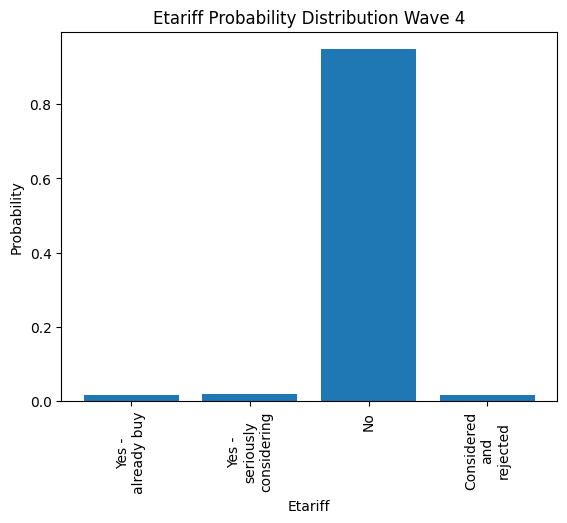

In [33]:
fourth_wave_etariff_probability_distribution = visualise_etariff(fourth_wave_etariff, 4) # visualise the fourth wave etariff variable

write_distribution(fourth_wave_etariff_probability_distribution, 4, "etariff")

##### Tenth Wave Data

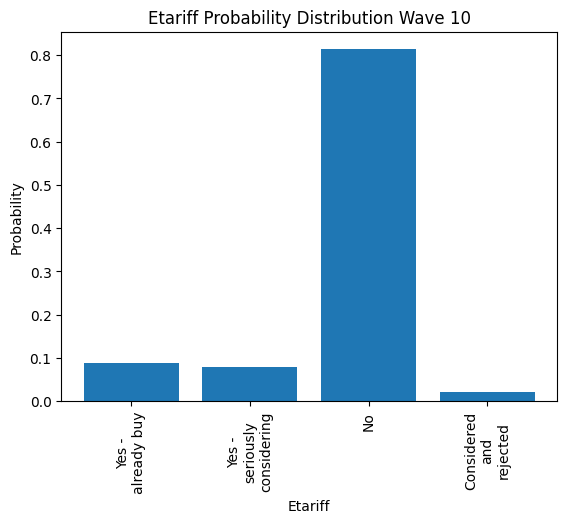

In [34]:
tenth_wave_etariff_probability_distribution = visualise_etariff(tenth_wave_etariff, 10) # visualise the tenth wave etariff variable

write_distribution(tenth_wave_etariff_probability_distribution, 10, "etariff")

##### Thirteenth Wave Data

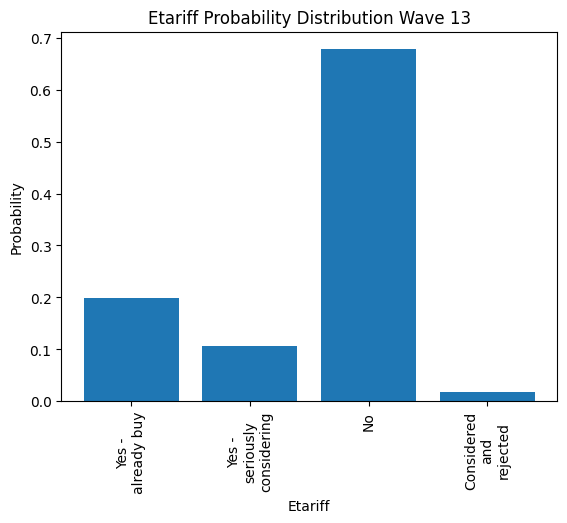

In [35]:
thirteenth_wave_etariff_probability_distribution = visualise_etariff(thirteenth_wave_etariff, 13) # visualise the thirteenth wave etariff variable

write_distribution(thirteenth_wave_etariff_probability_distribution, 13, "etariff")

#### Q7: Does your accommodation experience pollution cause by traffic or industry?

##### Data Loading

In [38]:
third_wave_ukhls_hhresp = hhresp_data[2] # load the data hhresp for the third wave
sixth_wave_ukhls_hhresp = hhresp_data[5] # load the data hhresp for the sixth wave
ninth_wave_ukhls_hhresp = hhresp_data[8] # load the data hhresp for the ninth wave
twelfth_wave_ukhls_hhresp = hhresp_data[11] # load the data hhresp for the twelfth

# load the variable grimyn from the 3rd, 6th, 9th, and 12th wave of the hhresp data
third_wave_grimyn = third_wave_ukhls_hhresp["c_grimyn"]
sixth_wave_grimyn = sixth_wave_ukhls_hhresp["f_grimyn"]
ninth_wave_grimyn = ninth_wave_ukhls_hhresp["i_grimyn"]
twelfth_wave_grimyn = twelfth_wave_ukhls_hhresp["l_grimyn"]

##### Visualisation Function

In [39]:
def visualise_grimyn(data, wave_number):
    """
    Visualizes the probability distribution of the grimyn variable.

    Parameters:
    - data (pandas.Series): The data containing the grimyn variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    grimyn_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Yes", "No"]

    grimyn_dict = {
        1: "Yes",
        2: "No"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(grimyn_dict)

    # Calculate the probability distribution of the grimyn labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the grimyn variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Grimyn')
    plt.ylabel('Probability')

    if wave_number == 3:
        plt.title('Grimyn Probability Distribution Wave 3')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 3.png", bbox_inches='tight')

    elif wave_number == 6:
        plt.title('Grimyn Probability Distribution Wave 6')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 6.png", bbox_inches='tight')

    elif wave_number == 9:

        plt.title('Grimyn Probability Distribution Wave 9')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 9.png", bbox_inches='tight')

    elif wave_number == 12:

        plt.title('Grimyn Probability Distribution Wave 12')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 12.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Third Wave Data

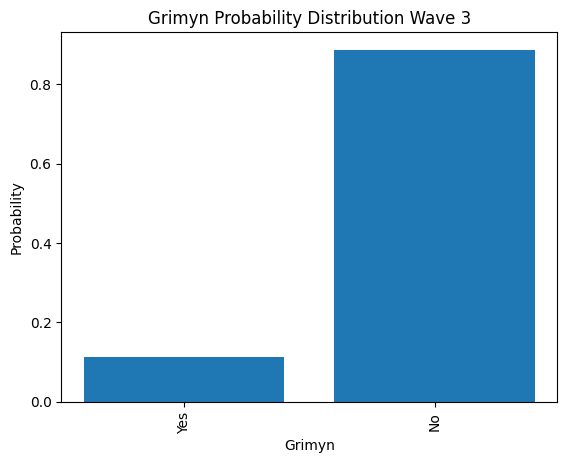

In [42]:
third_wave_grimyn_probability_distribution = visualise_grimyn(third_wave_grimyn, 3) # visualise the third wave grimyn variable

write_distribution(third_wave_grimyn_probability_distribution, 3, "grimyn")

##### Sixth Wave Data

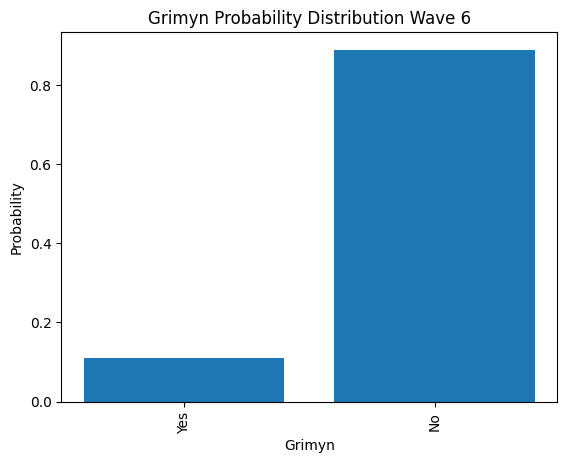

In [43]:
sixth_wave_grimyn_probability_distribution = visualise_grimyn(sixth_wave_grimyn, 6) # visualise the sixth wave grimyn variable

##### Ninth Wave Data

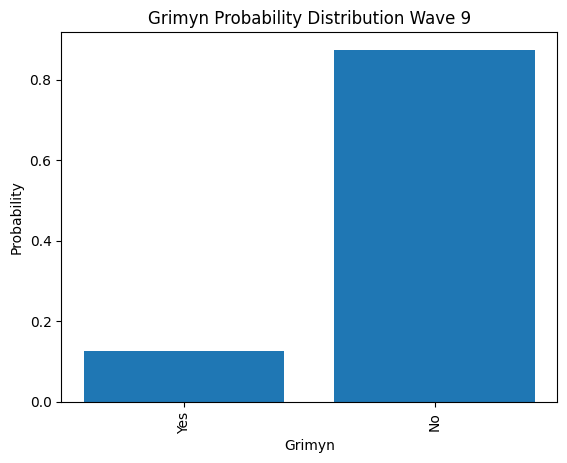

In [44]:
ninth_wave_grimyn_probability_distribution = visualise_grimyn(ninth_wave_grimyn, 9) # visualise the ninth wave grimyn variable

##### Twelfth Wave Data

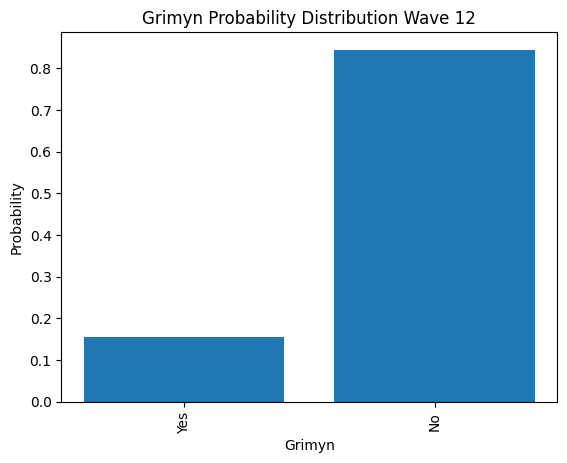

In [45]:
twelfth_wave_grimyn_probability_distribution = visualise_grimyn(twelfth_wave_grimyn, 12) # visualise the twelfth wave grimyn variable

#### Q8: Based on your profile, please state your opinion about joining environmental organisations.

In [47]:
third_wave_ukhls_indresp = indresp_data[2] # load the data indresp for the third wave
sixth_wave_ukhls_indresp = indresp_data[5] # load the data indresp for the sixth wave
ninth_wave_ukhls_indresp = indresp_data[8] # load the data indresp for the ninth wave
twelfth_wave_ukhls_indresp = indresp_data[11] # load the data indresp for the twelfth

third_wave_orga3 = third_wave_ukhls_indresp["c_orga3"]
sixth_wave_orga3 = sixth_wave_ukhls_indresp["f_orga3"]
ninth_wave_orga3 = ninth_wave_ukhls_indresp["i_orga3"]
twelfth_wave_orga3 = twelfth_wave_ukhls_indresp["l_orga3"]

##### Visualisation Function

In [48]:
def visualise_orga_3(data, wave_number):
    '''
    Visualises the probability distribution of the orga3 variable.

    Parameters:
    - data (pandas.Series): The data containing the orga3 variable.
    - wave_number (int): The wave number of the data.

    Returns:
    - data_probability_distribution (dict): A dictionary representing the probability distribution of the orga3 variable.
    '''
    # remove data values less than 0.
    data = data[data >= 0]

    orga3_unique = data.unique()

    print(orga3_unique)

    ordered_categories = ["Mentioned", "Not Mentioned"]

    orga3_dict = {
        1: "Mentioned",
        0: "Not Mentioned"
    }

    data_labels = data.map(orga3_dict)

    data_probability_distribution = data_labels.value_counts(normalize=True)

    data_probability_distribution = data_probability_distribution.to_dict()

    print(data_probability_distribution)

    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    plt.xticks(rotation=90)

    plt.xlabel('Orga3')

    plt.ylabel('Probability')

    plt.title('Orga3 Probability Distribution Wave ' + str(wave_number))

    plt.savefig("Figures/Environmental-Views-Variables/orga3/Orga3 Probability Distribution Wave " + str(wave_number) + ".png", bbox_inches='tight')

    return data_probability_distribution

##### Third Wave Data

[0 1]
{'Not Mentioned': 0.9825230660042583, 'Mentioned': 0.01747693399574166}


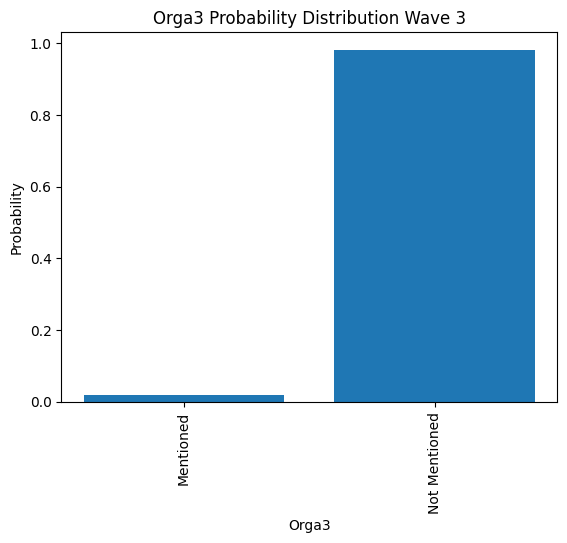

In [51]:
third_wave_orga3_probability_distribution = visualise_orga_3(third_wave_orga3, 3)

write_distribution(third_wave_orga3_probability_distribution, 3, "orga3")

##### Sixth Wave Data

[0 1]
{'Not Mentioned': 0.9824015422748554, 'Mentioned': 0.017598457725144588}


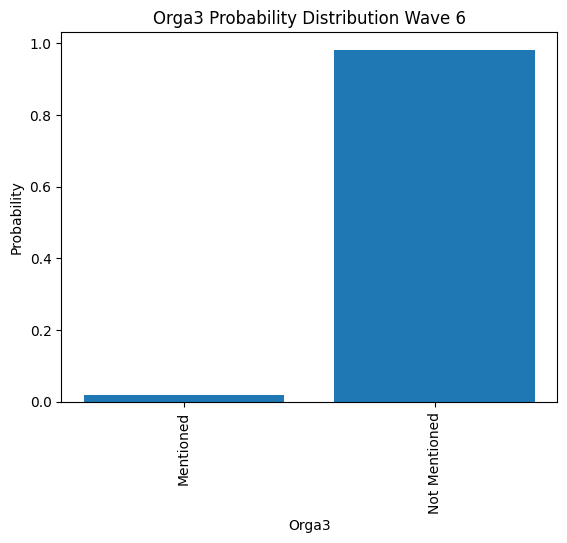

In [52]:
sixth_wave_orga3_probability_distribution = visualise_orga_3(sixth_wave_orga3, 6)

##### Ninth Wave Data

[0 1]
{'Not Mentioned': 0.9822133240482822, 'Mentioned': 0.017786675951717734}


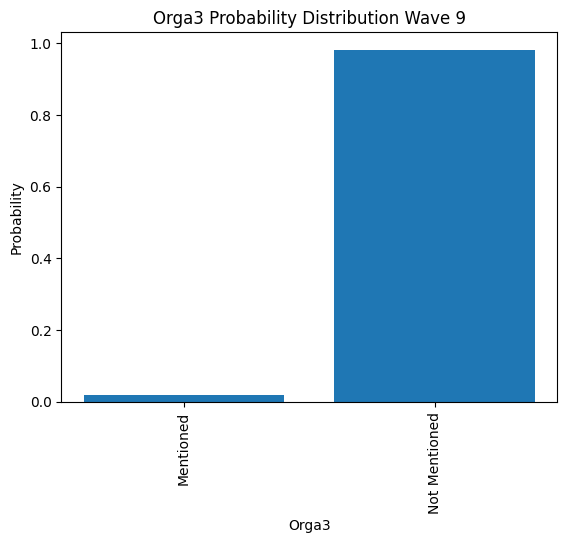

In [53]:
ninth_wave_orga3_probability_distribution = visualise_orga_3(ninth_wave_orga3, 9)

##### Twelfth Wave Data

[0 1]
{'Not Mentioned': 0.9793366405641425, 'Mentioned': 0.020663359435857488}


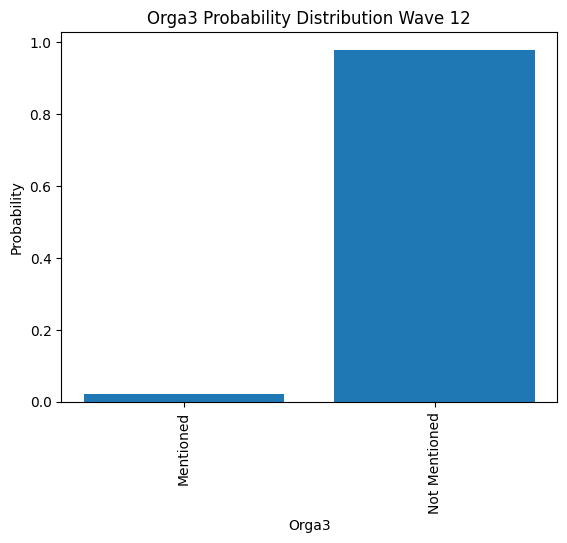

In [54]:
twelfth_wave_orga3_probability_distribution = visualise_orga_3(twelfth_wave_orga3, 12)

#### Q9: To which extent do you believe that climate change is controllable?

##### Data Loading

In [55]:
# load the scenv_tlat variable from fourth and tenth wave of indresp data
fourth_wave_scenv_tlat = fourth_wave_ukhls_indresp["d_scenv_tlat"]
tenth_wave_scenv_tlat = tenth_wave_ukhls_indresp["j_scenv_tlat"]

##### Visualisation Function

In [56]:
def visualise_tlat(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_tlat variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_tlat variable.
    - wave_number (int): The wave number of the data.

    Returns:
    - data probability distribution (dict): A dictionary representing the probability distribution of the scenv_tlat variable.
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_tlat_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    scenv_tlat_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_tlat_dict)

    # Calculate the probability distribution of the scenv_tlat labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_tlat variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Tlat')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Tlat Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_tlat/Scenv Tlat Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Tlat Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_tlat/Scenv Tlat Probability Distribution Wave 10.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Fourth Wave Data

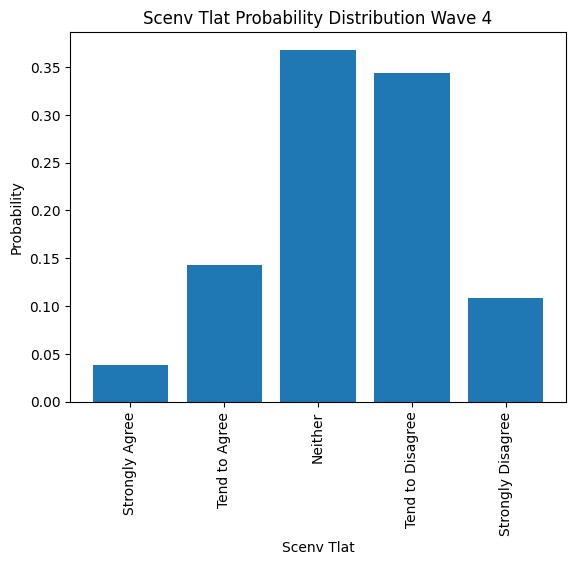

In [58]:
fourth_wave_scenv_tlat_probability_distribution = visualise_tlat(fourth_wave_scenv_tlat, 4) # visualise the fourth wave scenv_tlat variable

write_distribution(fourth_wave_scenv_tlat_probability_distribution, 4, "scenv_tlat")

##### Tenth Wave Data

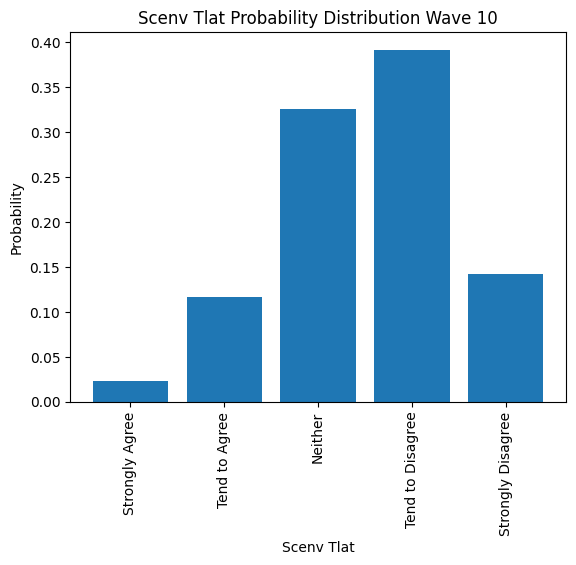

In [59]:
tenth_wave_scenv_tlat_probability_distribution = visualise_tlat(tenth_wave_scenv_tlat, 10) # visualise the tenth wave scenv_tlat variable

write_distribution(tenth_wave_scenv_tlat_probability_distribution, 10, "scenv_tlat")